# Parte 1

Realize uma análise e decomposição da série a partir dos passos definidos em a e b. 


**Roteiro 1:**
1. Estimar tendência através de ajuste exponencial
2. Eliminar a tendência estimada
3. Estimar a sazonalidade através de médias móveis
4. Eliminar a sazonalidade
5. Analisar o resíduo para verificar se pertence a uma distribuição IID

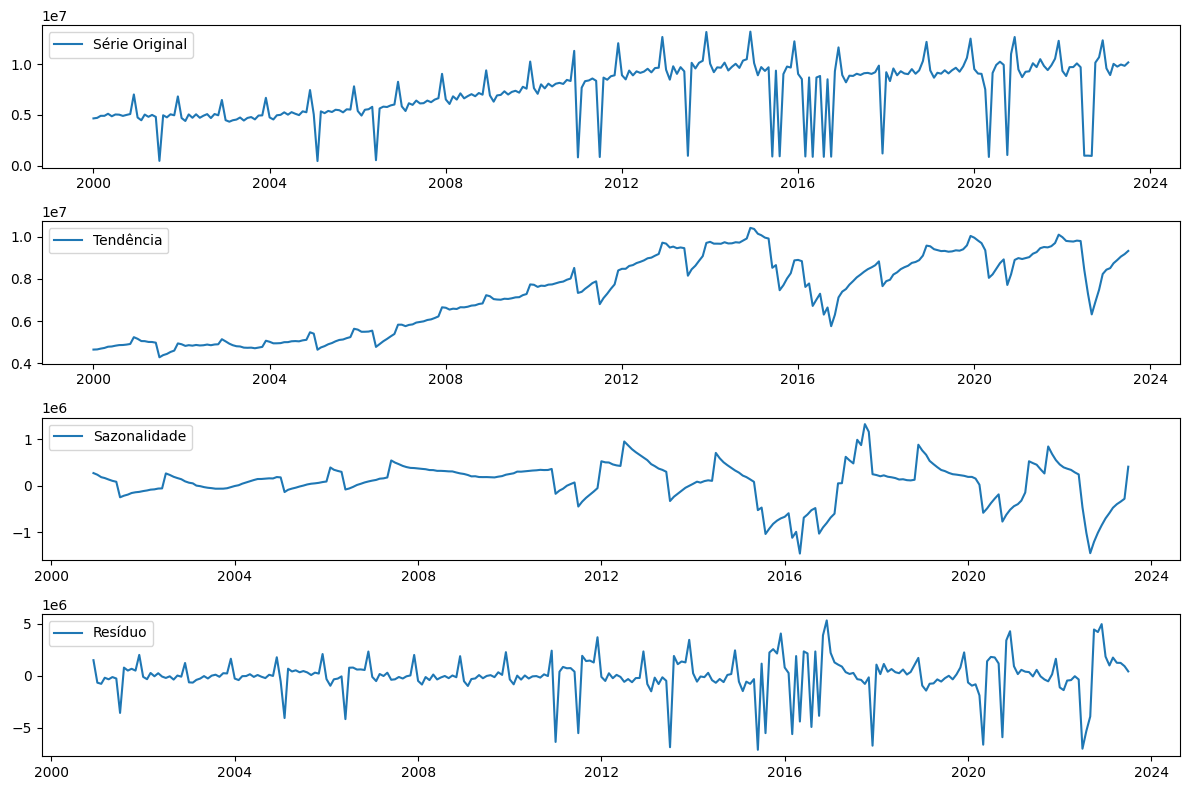

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carregar os dados e definir a primeira coluna como índice
url = "https://raw.githubusercontent.com/Nethyaze/S-ries-Temporais/main/vendas_brasil%20-%20vendas_brasil.csv"
dados = pd.read_csv(url, index_col=0)

# Limpar os valores na coluna 'Brasil' e converter para tipo numérico
dados['Brasil'] = dados['Brasil'].str.replace('.', '').astype(int)

# Converter o índice para formato datetime
dados.index = pd.to_datetime(dados.index, format='%d/%m/%y')

# Passo 1: Estimar a Tendência através de Ajuste Exponencial
tendencia = dados['Brasil'].ewm(span=12, adjust=False).mean()

# Passo 2: Eliminar a Tendência Estimada
serie_sem_tendencia = dados['Brasil'] - tendencia

# Passo 3: Estimar a Sazonalidade através de Médias Móveis
sazonalidade = serie_sem_tendencia.rolling(window=12).mean()

# Passo 4: Eliminar a Sazonalidade
serie_sem_sazonalidade = serie_sem_tendencia - sazonalidade

# Passo 5: Analisar o Resíduo para Verificar se Pertence a uma Distribuição IID
residuo = serie_sem_sazonalidade.dropna()

# Plotar a série original, tendência, sazonalidade e resíduo
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(dados['Brasil'], label='Série Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(sazonalidade, label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residuo, label='Resíduo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()




**Explicação Roteiro 1:**

1. **Estimar Tendência através de Ajuste Exponencial:**
   - Utilizamos a técnica de ajuste exponencial para estimar a tendência nos dados de vendas do Brasil ao longo do tempo. Isso nos permite identificar o padrão de crescimento ou decrescimento exponencial nos números de vendas.

2. **Eliminar Tendência Estimada:**
   - Subtraímos a tendência estimada dos dados originais para eliminar o componente de tendência. Isso resulta em uma série temporal sem a influência do crescimento ou decrescimento exponencial.

3. **Estimar Sazonalidade através de Médias Móveis:**
   - Utilizamos o método de médias móveis para estimar a sazonalidade nos dados de vendas. Isso nos ajuda a identificar padrões recorrentes ou sazonalidades que ocorrem em intervalos fixos de tempo.

4. **Eliminar Sazonalidade:**
   - Subtraímos a sazonalidade estimada da série temporal sem a tendência para eliminar o efeito sazonal. Isso nos deixa com uma série temporal livre de tendência e sazonalidade, conhecida como resíduo.

5. **Analisar o Resíduo para Verificar se Pertence a uma Distribuição IID (Independente e Identicamente Distribuída):**
   - Analisamos o resíduo obtido após a remoção da tendência e sazonalidade para verificar se ele possui propriedades de uma distribuição IID. Isso é fundamental para entender se os resíduos podem ser considerados aleatórios e independentes, o que é importante para muitas análises estatísticas.


**Roteiro 2:**
1. Eliminar a tendência através de diferenciação
2. Eliminar a sazonalidade através de diferenciação
3. Analisar o resíduo para verificar se pertence a uma distribuição IID



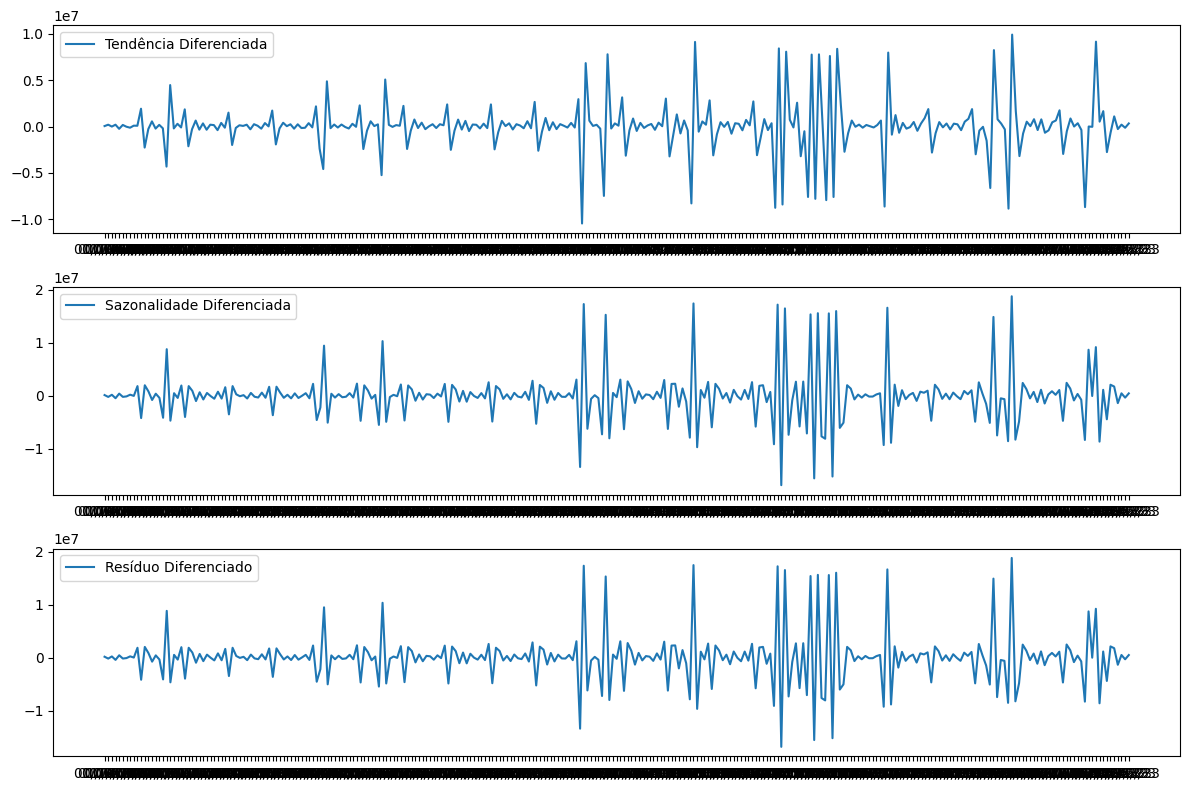

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/Nethyaze/S-ries-Temporais/main/vendas_brasil%20-%20vendas_brasil.csv"
dados = pd.read_csv(url, index_col=0, thousands='.', decimal=',')

# Converter a coluna 'Brasil' para tipo numérico
dados['Brasil'] = pd.to_numeric(dados['Brasil'], errors='coerce')

# Roteiro 2: Eliminar a tendência através de diferenciação
tendencia_diff = dados['Brasil'].diff().dropna()

# Eliminar a sazonalidade através de diferenciação
sazonalidade_diff = tendencia_diff.diff().dropna()

# Analisar o resíduo para verificar se pertence a uma distribuição IID
residuo_diff = sazonalidade_diff.dropna()

# Plotar as séries após a diferenciação
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(tendencia_diff, label='Tendência Diferenciada')
plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(sazonalidade_diff, label='Sazonalidade Diferenciada')
plt.legend(loc='best')
plt.subplot(3, 1, 3)
plt.plot(residuo_diff, label='Resíduo Diferenciado')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



**Explicação Roteiro 2:**

1. **Eliminar a Tendência através de Diferenciação:**
   - Utilizamos a técnica de diferenciação para remover a tendência dos dados de vendas do Brasil. A diferenciação envolve subtrair cada valor pelo seu valor anterior, resultando em uma série temporal que mostra as mudanças nas vendas ao longo do tempo, sem a componente de tendência.

2. **Eliminar a Sazonalidade através de Diferenciação:**
   - Após eliminar a tendência, aplicamos uma segunda diferenciação para remover a sazonalidade dos dados. Isso nos ajuda a identificar padrões sazonais que ocorrem em intervalos fixos de tempo, deixando-nos com uma série temporal livre de tendência e sazonalidade.

3. **Analisar o Resíduo para Verificar se Pertence a uma Distribuição IID (Independente e Identicamente Distribuída):**
   - O resultado da segunda diferenciação é o resíduo. Analisamos este resíduo para verificar se ele possui propriedades de uma distribuição IID. A distribuição IID é importante para muitas análises estatísticas, pois implica que os resíduos são aleatórios e independentes, o que é fundamental para previsões precisas e interpretações confiáveis.


# Parte 2

Utilize novamente a série `vendas_brasil` para testar um mecanismo de previsão. Trata-se de um mecanismo mais simplificado, que terá como base a tendência estimada por uma regressão linear. Realize os seguintes passos:

1. **Estime a tendência utilizando regressão linear:** Em Python, utilize a função `fit()` do módulo Linear Regression [StatsModels](https://www.statsmodels.org/stable/regression.html).

2. **Elimine a tendência com o valor estimado pela regressão linear.**

3. **Estime a sazonalidade através das médias móveis:** Use uma janela móvel, por exemplo, uma janela de 12 meses para considerar uma sazonalidade anual.

4. **Elimine a sazonalidade da série.**

5. **Utilize a função `predict()` do modelo de regressão linear para gerar a reta de tendência para todos os índices da série.**

6. **Adicione a tendência estimada à sazonalidade.**

7. **Adicione ao resultado um ruído de média zero.**

8. **Compare em um mesmo gráfico a série original e a série prevista.**


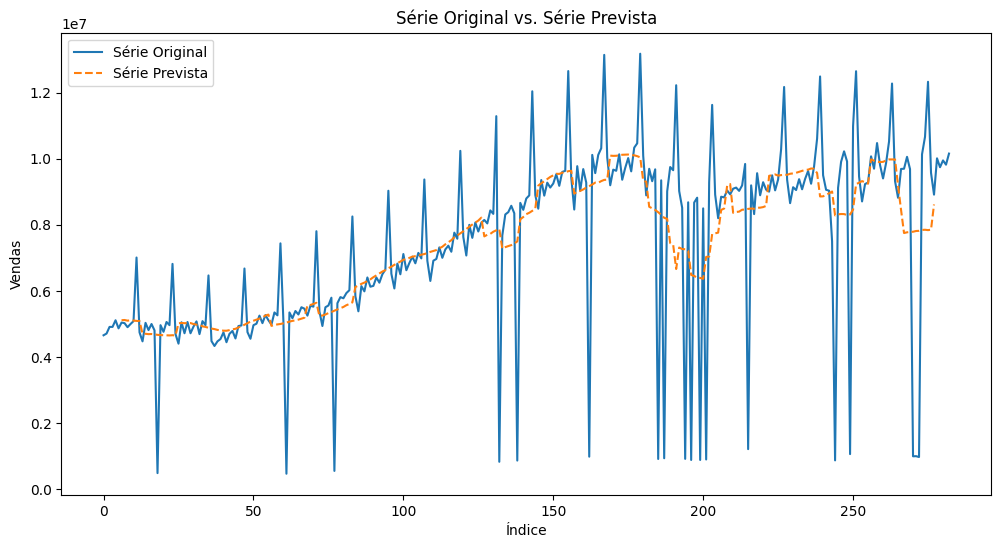

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar os dados da série temporal
url = "https://raw.githubusercontent.com/Nethyaze/S-ries-Temporais/main/vendas_brasil%20-%20vendas_brasil.csv"
data = pd.read_csv(url)

# Remover os pontos da coluna 'Brasil' e converter para inteiros
data['Brasil'] = data['Brasil'].str.replace('.', '').astype(int)

# Extrair variáveis independentes e dependentes
x = np.arange(len(data))
y = data['Brasil'].values

# Adicionar uma constante ao modelo (intercepto)
x_com_constante = sm.add_constant(x)

# Estimar a tendência utilizando regressão linear
modelo_regressao = sm.OLS(y, x_com_constante).fit()

# Obter os coeficientes da regressão para a tendência
tendencia_estimada = modelo_regressao.predict(x_com_constante)

# Eliminar a tendência da série
serie_sem_tendencia = y - tendencia_estimada

# Estimar a sazonalidade através das médias móveis
janela = 12  # Considerando uma sazonalidade anual (12 meses)
sazonalidade_estimada = pd.Series(serie_sem_tendencia).rolling(window=janela, center=True).mean()

# Eliminar a sazonalidade da série
serie_sem_sazonalidade = serie_sem_tendencia - sazonalidade_estimada

# Utilizar a função predict() para gerar a reta de tendência para todos os índices da série
x_com_constante_todos_indices = sm.add_constant(np.arange(len(data)))
tendencia_para_todos_indices = modelo_regressao.predict(x_com_constante_todos_indices)

# Adicionar a tendência estimada à sazonalidade
serie_completa_estimada = tendencia_para_todos_indices + sazonalidade_estimada

# Adicionar ruído de média zero
ruido = np.random.normal(0, 1000, len(data))
serie_final_estimada = serie_completa_estimada + ruido

# Criar um gráfico comparando a série original e a série prevista
plt.figure(figsize=(12, 6))
plt.plot(y, label='Série Original')
plt.plot(serie_final_estimada, label='Série Prevista', linestyle='dashed')
plt.xlabel('Índice')
plt.ylabel('Vendas')
plt.legend()
plt.title('Série Original vs. Série Prevista')
plt.show()






1. **Estimar a tendência utilizando regressão linear:** Utiliza a função OLS do módulo statsmodels para isso.
2. **Eliminar a tendência:** Subtraindo a tendência estimada da série original.
3. **Estimar a sazonalidade através das médias móveis:** Usa uma janela de 12 meses para médias móveis.
4. **Eliminar a sazonalidade da série:** Subtraindo a sazonalidade estimada da série sem tendência.
5. **Gerar a reta de tendência para todos os índices:** Usa a função predict() do modelo de regressão linear.
6. **Adicionar a tendência estimada à sazonalidade:** Soma a tendência estimada e a sazonalidade.
7. **Adicionar ruído de média zero:** Adiciona um ruído aleatório.
8. **Comparar a série original e a série prevista:** Ambas são plotadas no mesmo gráfico para comparação.
